In [ ]:
! pip install librosa
! pip install spotify_dl

In [3]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [4]:
audio_file = "music_samples/day-stalker.wav"
y, sr = librosa.load(audio_file)  # sr=None to preserve the original sampling rate

In [5]:
features = ["MFCC", "Tempo", "Energy", "Pitch", "Zero Crossing Rate", "Chroma", "Danceability", "Chorus"]

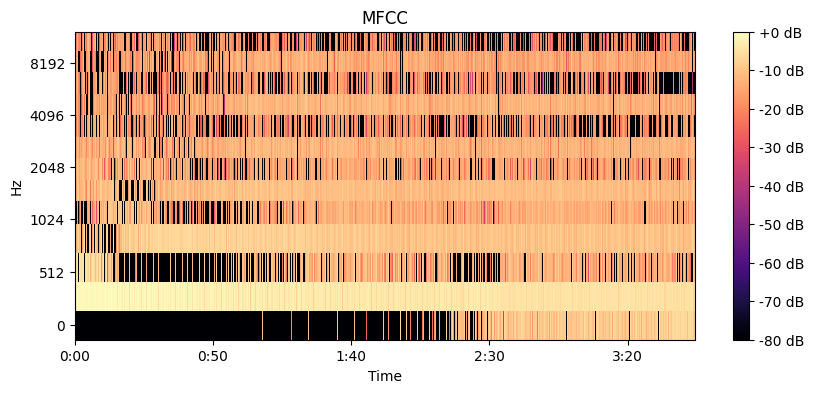

In [9]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)

# Save MFCCs as a CSV file
mfccs_df = pd.DataFrame(mfccs)
mfccs_df.to_csv("mfccs.csv", index=False)

# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

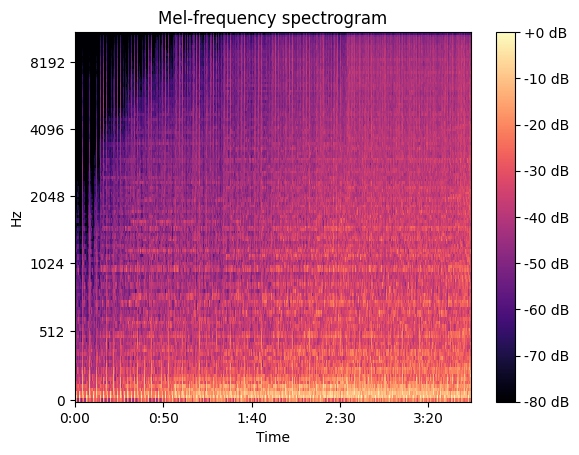

In [8]:
mel_sgram = librosa.feature.melspectrogram(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel_sgram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')